# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [253]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [254]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [255]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [256]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [257]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [258]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [259]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [260]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [261]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."


In [262]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [263]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [264]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [265]:
sent = decontracted(project_data['essay'].values[20000])

In [266]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')

In [267]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

In [268]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [269]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
project_data['preprocessed_essays'] = preprocessed_essays

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:06<00:00, 747.95it/s]


### Number of words in combined Essay - Adding a new feature

In [270]:
# after preprocesing
proj_essay_wrd_count = []

for word in project_data['preprocessed_essays']:
    proj_essay_wrd_count.append(len(word.split()))
project_data['proj_essay_wrd_count'] = proj_essay_wrd_count

project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,preprocessed_essays,proj_essay_wrd_count
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,recently read article giving students choice l...,114
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,101
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,Breakout Box to Ignite Engagement!,It's the end of the school year. Routines have...,"My students desire challenges, movement, and c...",I will design different clues using specific c...,Donations to this project will immediately imp...,"My students need items from a \""Breakout Box\""...",6,1,Math_Science History_Civics,Mathematics SocialSciences,It's the end of the school year. Routines have...,end school year routines run course students n...,147


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [271]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])

Flexible Seating for Flexible Learning
Elmo for Math Instruction
Comfy Carpet for Creative Learning


In [272]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
project_data['preprocessed_titles'] = preprocessed_titles

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 17018.89it/s]


## Project title word count

In [273]:
proj_title_wrd_count = []

for word in project_data['preprocessed_titles']:
    proj_title_wrd_count.append(len(word.split()))
project_data['proj_title_wrd_count'] = proj_title_wrd_count
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,preprocessed_essays,proj_essay_wrd_count,preprocessed_titles,proj_title_wrd_count
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,...,My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,recently read article giving students choice l...,114,flexible seating flexible learning,4
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,101,going deep the art inner thinking,6
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,Breakout Box to Ignite Engagement!,It's the end of the school year. Routines have...,"My students desire challenges, movement, and c...",...,"My students need items from a \""Breakout Box\""...",6,1,Math_Science History_Civics,Mathematics SocialSciences,It's the end of the school year. Routines have...,end school year routines run course students n...,147,breakout box ignite engagement,4


In [274]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
#nltk.download('vader_lexicon')

neg = []
pos = []
neu = []
compound = []

sid = SentimentIntensityAnalyzer()

for for_sentiment  in tqdm(project_data['preprocessed_essays']):

    neg.append(sid.polarity_scores(for_sentiment)['neg']) #Negative Sentiment score
    pos.append(sid.polarity_scores(for_sentiment)['pos']) #Positive Sentiment score
    neu.append(sid.polarity_scores(for_sentiment)['neu']) #Neutral Sentiment score
    compound.append(sid.polarity_scores(for_sentiment)['compound']) #Compound Sentiment score

# Creating new features    
project_data['Essay_neg_ss']      = neg
project_data['Essay_pos_ss']      = pos
project_data['Essay_neu_ss']      = neu
project_data['Essay_compound_ss'] = compound

project_data.head(3)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [11:44<00:00, 71.02it/s]


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,preprocessed_essays,proj_essay_wrd_count,preprocessed_titles,proj_title_wrd_count,Essay_neg_ss,Essay_pos_ss,Essay_neu_ss,Essay_compound_ss
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,...,EarlyDevelopment,I recently read an article about giving studen...,recently read article giving students choice l...,114,flexible seating flexible learning,4,0.031,0.194,0.775,0.9524
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",...,Literacy,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,101,going deep the art inner thinking,6,0.031,0.315,0.653,0.9873
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,Breakout Box to Ignite Engagement!,It's the end of the school year. Routines have...,"My students desire challenges, movement, and c...",...,Mathematics SocialSciences,It's the end of the school year. Routines have...,end school year routines run course students n...,147,breakout box ignite engagement,4,0.014,0.295,0.691,0.9935


## 1.4.1 Project_grade preprocessing

In [275]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(" ", "_")
project_data['project_grade_category'].value_counts()

Grades_PreK-2    20316
Grades_3-5       16968
Grades_6-8        7750
Grades_9-12       4966
Name: project_grade_category, dtype: int64

### Preprocessing teacher_prefix

In [276]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace(".","")
project_data['teacher_prefix'].value_counts()

Mrs        26140
Ms         17936
Mr          4859
Teacher     1061
Dr             2
Name: teacher_prefix, dtype: int64

## 1.5 Preparing data for models

In [277]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'proj_essay_wrd_count', 'preprocessed_titles',
       'proj_title_wrd_count', 'Essay_neg_ss', 'Essay_pos_ss', 'Essay_neu_ss',
       'Essay_compound_ss'],
      dtype='object')

we are going to consider

       
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - school_state : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - preprocessed_titles: text data
       - preprocessed_essays : text data

       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Split data into train,test and Cross validate

In [278]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)

In [279]:
X = project_data
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,preprocessed_essays,proj_essay_wrd_count,preprocessed_titles,proj_title_wrd_count,Essay_neg_ss,Essay_pos_ss,Essay_neu_ss,Essay_compound_ss
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs,GA,2016-04-27 00:53:00,Grades_PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,...,EarlyDevelopment,I recently read an article about giving studen...,recently read article giving students choice l...,114,flexible seating flexible learning,4,0.031,0.194,0.775,0.9524


In [280]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### One Hot Encode - Clean_Categories

In [281]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)


categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)

print("Shape of Train data - one hot encoding ",categories_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",categories_one_hot_test.shape)

f_nm_cat = vectorizer.get_feature_names()
print(f_nm_cat)

Shape of Train data - one hot encoding  (33500, 9)
Shape of Test data - one hot encoding  (16500, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


### One Hot Encode - Clean_Sub-Categories

In [282]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

sub_cat_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
sub_cat_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)


print("Shape of Train data - one hot encoding ",sub_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding",sub_cat_one_hot_test.shape)

f_nm_subcat = vectorizer.get_feature_names()
print(f_nm_subcat)

Shape of Train data - one hot encoding  (33500, 30)
Shape of Test data - one hot encoding (16500, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


### One Hot Encode - School_States

In [283]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [284]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [285]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)

school_state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer.transform(X_test['school_state'].values)


print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)

f_nm_ss = vectorizer.get_feature_names()
print(f_nm_ss)

Shape of Train data - one hot encoding (33500, 51)
Shape of Test data - one hot encoding (16500, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']


### One Hot Encode - Project_Grade_Category

In [286]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [287]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [288]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

project_grade_cat_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_cat_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)


print("Shape of Train data - one hot encoding",project_grade_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding",project_grade_cat_one_hot_test.shape)

f_nm_pgc = vectorizer.get_feature_names()
print(f_nm_pgc)

Shape of Train data - one hot encoding (33500, 4)
Shape of Test data - one hot encoding (16500, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


### One Hot Encode - Teacher_Prefix

In [289]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [290]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [291]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_cat_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_cat_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_cat_one_hot_test.shape)

f_nm_tp = vectorizer.get_feature_names()
print(f_nm_tp)

Shape of Train data - one hot encoding (33500, 6)
Shape of Test data - one hot encoding  (16500, 6)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

#### BOW of eassys - Train/Test Data

In [292]:
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10 ,max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'])

# BOW for essays Train Data
essay_bow_train = vectorizer.transform(X_train['preprocessed_essays'])
print("Shape of matrix for TRAIN data ",essay_bow_train.shape)
f_nm_bow_eassy_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_bow_eassy_tr[10:50])

# BOW for essays Test Data
essay_bow_test = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of matrix for TEST data",essay_bow_test.shape)

Shape of matrix for TRAIN data  (33500, 5000)
['20 minutes', '20 students', '2016 2017', '2017 school', '21st century', '22 students', '24 students', '25 students', '2nd grade', '2nd graders', '30 minutes', '30 students', '300 students', '3d printer', '3d printing', '3rd 4th', '3rd grade', '3rd graders', '40 students', '400 students', '4th 5th', '4th grade', '4th graders', '50 students', '500 students', '5th 6th', '5th grade', '5th graders', '60 minutes', '60 students', '600 students', '6th 7th', '6th grade', '6th graders', '70 students', '700 students', '75 students', '7th 8th', '7th grade', '7th graders']
Shape of matrix for TEST data (16500, 5000)


#### BOW of Project Titles - Train/Test Data¶

In [293]:
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10 ,max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'])

# BOW for title Train Data
title_bow_train = vectorizer.transform(X_train['preprocessed_titles'])
print("Shape of matrix for TRAIN data ",title_bow_train.shape)
f_nm_bow_title_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_bow_title_tr[10:50])

# BOW for title Test Data
title_bow_test = vectorizer.transform(X_test['preprocessed_titles'])
print("Shape of matrix for TEST data",title_bow_test.shape)

Shape of matrix for TRAIN data  (33500, 1062)
['4th graders', '5th grade', '5th graders', '6th grade', 'about it', 'about our', 'about reading', 'about science', 'academic success', 'access technology', 'active bodies', 'active kids', 'active learners', 'active learning', 'active minds', 'active play', 'active seating', 'active students', 'after school', 'all about', 'all around', 'all day', 'all hands', 'all learners', 'all students', 'alternative seating', 'an apple', 'an ear', 'an easel', 'an ipad', 'apple day', 'are not', 'are ready', 'around us', 'around world', 'art class', 'art room', 'art supplies', 'art technology', 'at our']
Shape of matrix for TEST data (16500, 1062)


#### TFIDF vectorizer for essay

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10 ,max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'])

#tidf Train Data
essay_tfidf_train = vectorizer.transform(X_train['preprocessed_essays'])
print("Shape of matrix for TRAIN data",essay_tfidf_train.shape)
f_nm_tidf_eassy_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_tidf_eassy_tr[10:50])

#tidf Test Data
essay_tfidf_test = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of matrix for TEST data",essay_tfidf_test.shape)

Shape of matrix for TRAIN data (33500, 5000)
['20 minutes', '20 students', '2016 2017', '2017 school', '21st century', '22 students', '24 students', '25 students', '2nd grade', '2nd graders', '30 minutes', '30 students', '300 students', '3d printer', '3d printing', '3rd 4th', '3rd grade', '3rd graders', '40 students', '400 students', '4th 5th', '4th grade', '4th graders', '50 students', '500 students', '5th 6th', '5th grade', '5th graders', '60 minutes', '60 students', '600 students', '6th 7th', '6th grade', '6th graders', '70 students', '700 students', '75 students', '7th 8th', '7th grade', '7th graders']
Shape of matrix for TEST data (16500, 5000)


#### TFIDF vectorizer for Title

In [295]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10 ,max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'])

#tidf Train Data
title_tfidf_train = vectorizer.transform(X_train['preprocessed_titles'])
print("Shape of matrix for TRAIN data",title_tfidf_train.shape)
f_nm_tidf_title_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_tidf_title_tr[10:50])


#tidf Test Data
title_tfidf_test = vectorizer.transform(X_test['preprocessed_titles'])
print("Shape of matrix for TEST data",title_tfidf_test.shape)

Shape of matrix for TRAIN data (33500, 1062)
['4th graders', '5th grade', '5th graders', '6th grade', 'about it', 'about our', 'about reading', 'about science', 'academic success', 'access technology', 'active bodies', 'active kids', 'active learners', 'active learning', 'active minds', 'active play', 'active seating', 'active students', 'after school', 'all about', 'all around', 'all day', 'all hands', 'all learners', 'all students', 'alternative seating', 'an apple', 'an ear', 'an easel', 'an ipad', 'apple day', 'are not', 'are ready', 'around us', 'around world', 'art class', 'art room', 'art supplies', 'art technology', 'at our']
Shape of matrix for TEST data (16500, 1062)


### AVG- W2V vectorizer for Essay

In [296]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [297]:
# average Word2Vec Function
# compute average word2vec for each review.
# the avg-w2v for each sentence/review is stored in this list
def avg_w2v_vectors_func(sentance):
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    return vector

In [298]:
essay_avg_w2v_train = []
essay_avg_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_essays']):
    essay_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Train data
    
# Avg-w2v for Train data    
print("len(essay_avg_w2v_train):",len(essay_avg_w2v_train))
print("len(essay_avg_w2v_train[0])",len(essay_avg_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_essays']):
    essay_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Test data

# Avg-w2v for Test data
print("len(essay_avg_w2v_test):",len(essay_avg_w2v_test))
print("len(essay_avg_w2v_test[0])",len(essay_avg_w2v_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 33500/33500 [00:16<00:00, 2025.70it/s]


len(essay_avg_w2v_train): 33500
len(essay_avg_w2v_train[0]) 300


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 2047.37it/s]


len(essay_avg_w2v_test): 16500
len(essay_avg_w2v_test[0]) 300


### AVG- W2V vectorizer for Titile

In [299]:
title_avg_w2v_train = []
title_avg_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Train data
    
# Avg-w2v for Train data    
print("len(title_avg_w2v_train):",len(title_avg_w2v_train))
print("len(title_avg_w2v_train[0])",len(title_avg_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_titles']):
    title_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Test data

# Avg-w2v for Test data
print("len(title_avg_w2v_test):",len(title_avg_w2v_test))
print("len(title_avg_w2v_test[0])",len(title_avg_w2v_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33500/33500 [00:00<00:00, 36362.66it/s]


len(title_avg_w2v_train): 33500
len(title_avg_w2v_train[0]) 300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 49863.58it/s]


len(title_avg_w2v_test): 16500
len(title_avg_w2v_test[0]) 300


### TFIDF weighted W2V for Essay

In [300]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [301]:
# Compute  TFIDF weighted W2V for each sentence of the review.

def tf_idf_weight_func(sentence): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    return vector

In [302]:
essay_tfidf_w2v_train = []
essay_tfidf_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_essays']):
    essay_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Train data
print("len(essay_tfidf_w2v_train)",len(essay_tfidf_w2v_train))
print("len(essay_tfidf_w2v_train[0])",len(essay_tfidf_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_essays']):
    essay_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Test data
print("len(essay_tfidf_w2v_test)",len(essay_tfidf_w2v_test))
print("len(essay_tfidf_w2v_test[0])",len(essay_tfidf_w2v_test[0]))

100%|████████████████████████████████████████████████████████████████████████| 33500/33500 [00:00<00:00, 218106.44it/s]


len(essay_tfidf_w2v_train) 33500
len(essay_tfidf_w2v_train[0]) 300


100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 192832.97it/s]


len(essay_tfidf_w2v_test) 16500
len(essay_tfidf_w2v_test[0]) 300


###  TFIDF weighted W2V for Titile

In [303]:
title_tfidf_w2v_train  = []
title_tfidf_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Train data
print("len(title_tfidf_w2v_train)",len(title_tfidf_w2v_train))
print("len(title_tfidf_w2v_train[0])",len(title_tfidf_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_titles']):
    title_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Test data
print("len(title_tfidf_w2v_test)",len(title_tfidf_w2v_test))
print("len(title_tfidf_w2v_test[0])",len(title_tfidf_w2v_test[0]))

100%|████████████████████████████████████████████████████████████████████████| 33500/33500 [00:00<00:00, 127829.63it/s]


len(title_tfidf_w2v_train) 33500
len(title_tfidf_w2v_train[0]) 300


100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 232396.38it/s]


len(title_tfidf_w2v_test) 16500
len(title_tfidf_w2v_test[0]) 300


### 1.5.3 Vectorizing Numerical features

In [304]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [305]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [306]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_data_train = normalizer.transform(X_train['price'].values.reshape(-1,1))

price_data_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print("="*100)
print(price_data_train.shape, Y_train.shape)
print(price_data_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


#### Vectorizing Quantity Feature

In [307]:
normalizer = Normalizer()

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quant_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quant_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(quant_train.shape, Y_train.shape)
print(quant_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


####  Vectorizing teacher_number_of_previously_posted_projects 

In [308]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_no_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_no_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(prev_no_projects_train.shape, Y_train.shape)
print(prev_no_projects_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### Vectorising the Word count of title feature

In [309]:
normalizer = Normalizer()

normalizer.fit(X_train['proj_title_wrd_count'].values.reshape(-1,1))

title_cnt_train = normalizer.transform(X_train['proj_title_wrd_count'].values.reshape(-1,1))
title_cnt_test = normalizer.transform(X_test['proj_title_wrd_count'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(title_cnt_train.shape, Y_train.shape)
print(title_cnt_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### Vectorising the Word count of Essay feature

In [310]:
normalizer = Normalizer()

normalizer.fit(X_train['proj_title_wrd_count'].values.reshape(-1,1))

essay_cnt_train = normalizer.transform(X_train['proj_essay_wrd_count'].values.reshape(-1,1))
essay_cnt_test = normalizer.transform(X_test['proj_essay_wrd_count'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(essay_cnt_train.shape, Y_train.shape)
print(essay_cnt_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### Vectorising the Sentiment scrore  for negative feature

In [311]:
normalizer = Normalizer()

normalizer.fit(X_train['Essay_neg_ss'].values.reshape(-1,1))

essay_neg_train = normalizer.transform(X_train['Essay_neg_ss'].values.reshape(-1,1))
essay_neg_test = normalizer.transform(X_test['Essay_neg_ss'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(essay_neg_train.shape, Y_train.shape)
print(essay_neg_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### Vectorising the Sentiment scrore  for positive feature

In [312]:
normalizer = Normalizer()

normalizer.fit(X_train['Essay_pos_ss'].values.reshape(-1,1))

essay_pos_train = normalizer.transform(X_train['Essay_pos_ss'].values.reshape(-1,1))
essay_pos_test = normalizer.transform(X_test['Essay_pos_ss'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(essay_pos_train.shape, Y_train.shape)
print(essay_pos_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### Vectorising the Sentiment scrore  for neural feature

In [313]:
normalizer = Normalizer()

normalizer.fit(X_train['Essay_neu_ss'].values.reshape(-1,1))

essay_neu_train = normalizer.transform(X_train['Essay_neu_ss'].values.reshape(-1,1))
essay_neu_test = normalizer.transform(X_test['Essay_neu_ss'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(essay_neu_train.shape, Y_train.shape)
print(essay_neu_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### Vectorising the Sentiment scrore  for compund feature

In [314]:
normalizer = Normalizer()

normalizer.fit(X_train['Essay_compound_ss'].values.reshape(-1,1))

essay_compound_train = normalizer.transform(X_train['Essay_compound_ss'].values.reshape(-1,1))
essay_compund_test = normalizer.transform(X_test['Essay_compound_ss'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(essay_compound_train.shape, Y_train.shape)
print(essay_compund_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression</h1>

### 2.4.1 Applying Logistic Regression on BOW,<font color='red'> SET 1</font>

In [315]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_bow_train, essay_bow_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_bow_test, essay_bow_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)

print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33500, 6165) (33500,)
(16500, 6165) (16500,)


#### Best hyper prameter using the ROC/AUC higest value and K-fold cross validation.

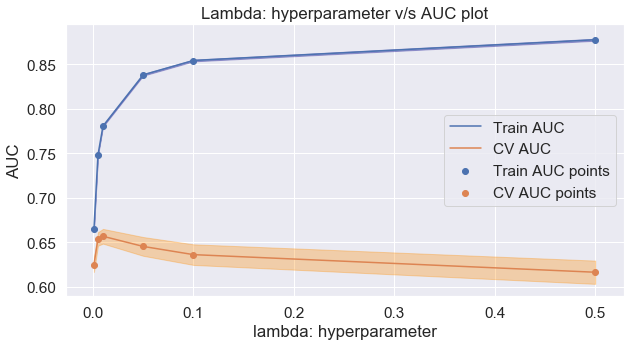

In [340]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005,0.001]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(10,5))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid(True)
plt.show()

In [337]:
best_c = 0.001 # Value obtained from the above hyperparameter search.

### Best Train Model using best Hyper parameter.

In [338]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

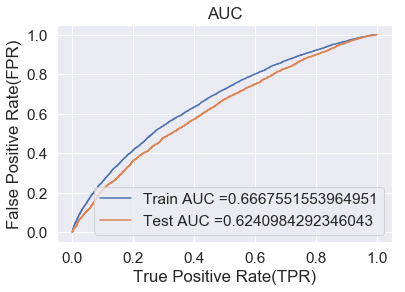

In [341]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = best_c) #Multinominal Naive Bayes.
lr.fit(X_train_merge, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_train_merge)[:,1]    
y_test_pred = lr.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [342]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [343]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.819
[[ 2584  2584]
 [ 7820 20512]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.847
[[1857  689]
 [7768 6186]]


### Confusion Matrix -Heat map - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.819


Text(26.5, 0.5, 'Actual Label')

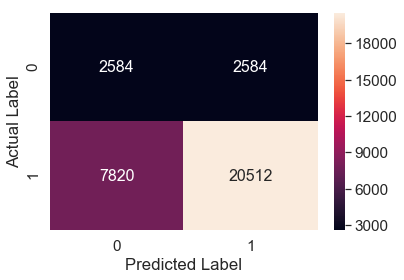

In [344]:
conf_mat_BOW_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_BOW_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix -Heat map - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.847


Text(26.5, 0.5, 'Actual Label')

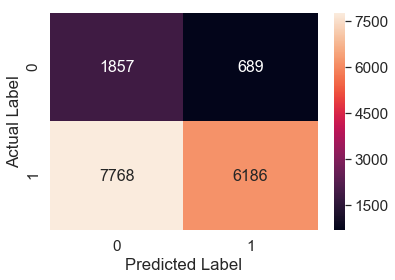

In [345]:
conf_mat_BOW_test= pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_BOW_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### 2.4.2 Applying Logistic Regression on TFIDF,<font color='red'> SET 2</font>

In [346]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_tfidf_train, essay_tfidf_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_test, essay_tfidf_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33500, 6165) (33500,)
(16500, 6165) (16500,)


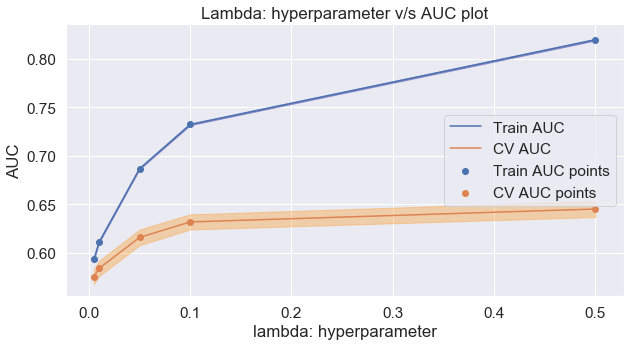

Best: 0.645195 using {'C': 0.5}
Execution time: 50.5546088218689 ms


In [356]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()

lr = LogisticRegression(penalty='l2')

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

grid_result = clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(10,5))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid(True)
plt.show()
# Summarize results , https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [354]:
best_c = 0.05 #Best hyper parameter value for the model

#### Train Model using the best value of the hyper parameter

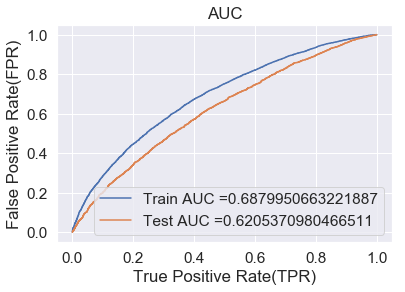

In [358]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(C = best_c) #Multinominal Naive Bayes.
lr.fit(X_train_merge, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_train_merge)[:,1]       
y_test_pred = lr.predict_proba(X_test_merge)[:,1]   

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

#### Confusion Matrix

In [359]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.826
[[ 2584  2584]
 [ 7035 21297]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.856
[[1761  785]
 [7338 6616]]


### Confusion Matrix - Heat map -train.

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.826


Text(26.5, 0.5, 'Actual Label')

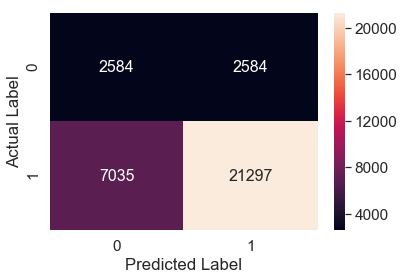

In [360]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

#### Confusion Matrix - Heat map - TEST data.

the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.856


Text(26.5, 0.5, 'Actual Label')

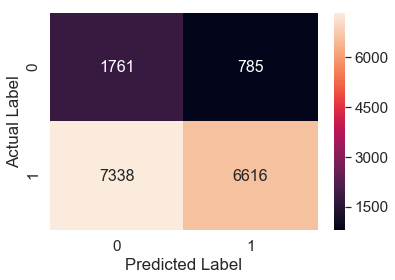

In [361]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# 2.4.3 Applying Logistic Regression on AVG-W2V , SET 3

In [362]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_avg_w2v_train, essay_avg_w2v_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_avg_w2v_test, essay_avg_w2v_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33500, 703) (33500,)
(16500, 703) (16500,)


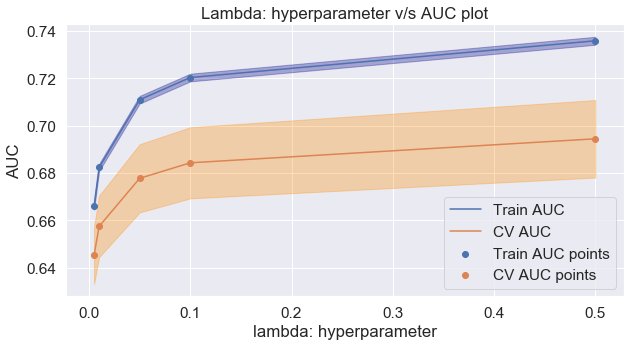

In [363]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(10,5))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid(True)
plt.show()

### Train the model using the best hyperparameter

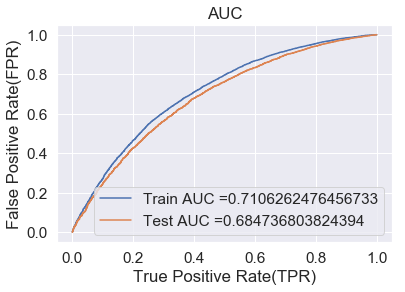

In [364]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(C = 0.05) #Multinominal Naive Bayes.
lr.fit(X_train_merge, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_train_merge)[:,1]       
y_test_pred = lr.predict_proba(X_test_merge)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [365]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.803
[[ 2584  2584]
 [ 5789 22543]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.865
[[1879  667]
 [6776 7178]]


### Confusion Matrix - Heat map - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.803


Text(26.5, 0.5, 'Actual Label')

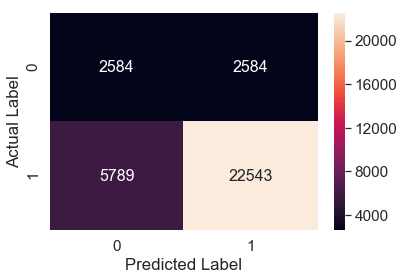

In [367]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - Heat Map -Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.865


Text(26.5, 0.5, 'Actual Label')

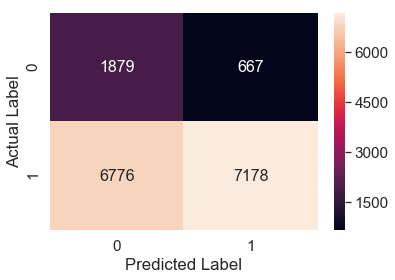

In [368]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# 2.4.4 Applying Logistic Regression on TFIDF W2V , SET 4

In [369]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_tfidf_w2v_train, essay_tfidf_w2v_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_w2v_test, essay_tfidf_w2v_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33500, 703) (33500,)
(16500, 703) (16500,)


### Finding the best Hyper Parameter - Grid Search

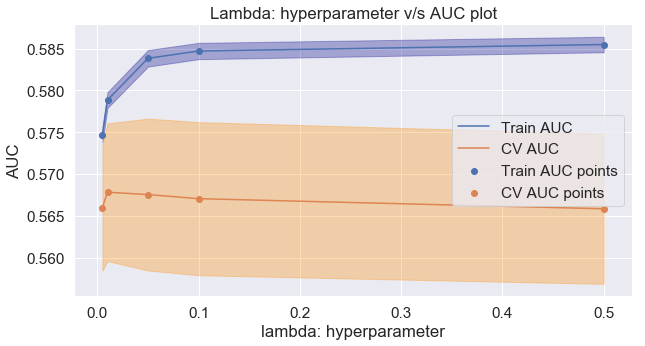

In [370]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(10,5))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid(True)
plt.show()

### Train the model using the best Hyperparameter

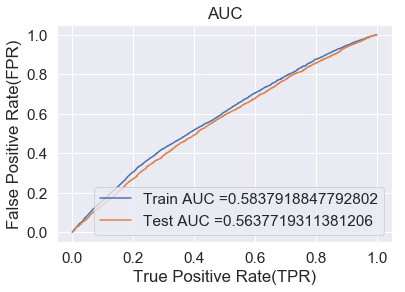

In [371]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(C = 0.1) #Multinominal Naive Bayes.
lr.fit(X_train_merge, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_train_merge)[:,1]       
y_test_pred = lr.predict_proba(X_test_merge)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [372]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999985023339627 for threshold 0.84
[[ 2586  2582]
 [11106 17226]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.859
[[1723  823]
 [8163 5791]]


### Confusion Matrix - HeatMap - Train

the maximum value of tpr*(1-fpr) 0.24999985023339627 for threshold 0.84


Text(26.5, 0.5, 'Actual Label')

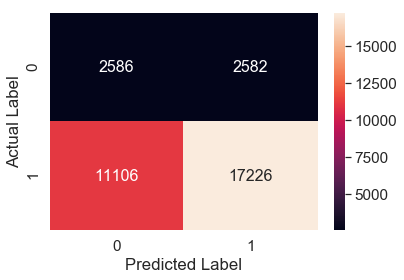

In [373]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - HeatMap - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.859


Text(26.5, 0.5, 'Actual Label')

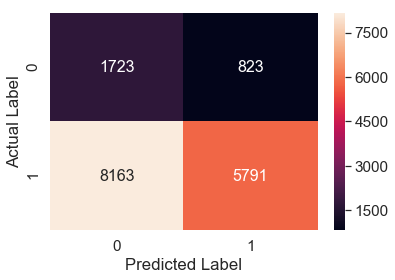

In [374]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## 2.4.5 Applying Logistic Regression on Non-Text Features , SET 5

In [375]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_cnt_train,essay_cnt_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_compound_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_cnt_test,essay_cnt_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_compund_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33500, 109) (33500,)
(16500, 109) (16500,)


### Finding the best Hyper Parameter - Grid Search

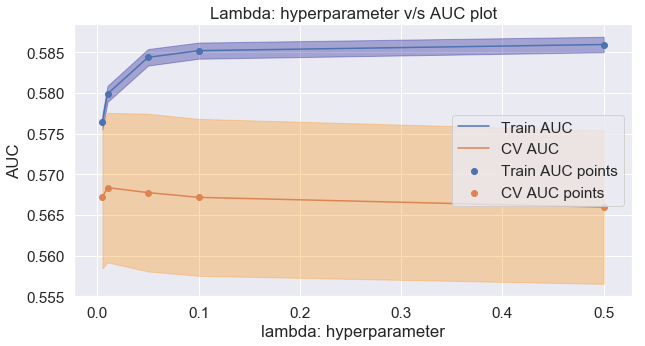

In [376]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(10,5))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid(True)
plt.show()

### Train the model using the best Hyperparameter

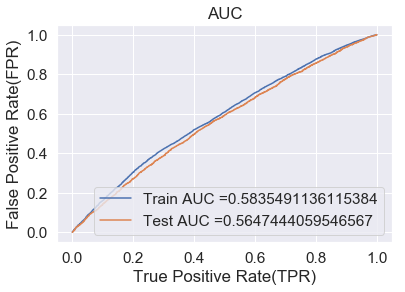

In [377]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(C = 0.05) #Multinominal Naive Bayes.
lr.fit(X_train_merge, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_train_merge)[:,1]       
y_test_pred = lr.predict_proba(X_test_merge)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [378]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.841
[[ 2584  2584]
 [11104 17228]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.859
[[1741  805]
 [8218 5736]]


### Confusion Matrix - Heatmap - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.841


Text(26.5, 0.5, 'Actual Label')

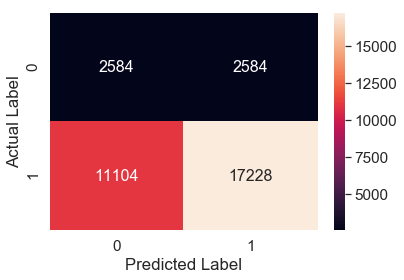

In [379]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - Heatmap - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.859


Text(26.5, 0.5, 'Actual Label')

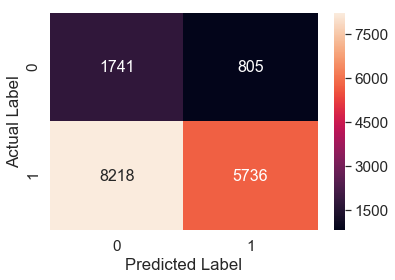

In [380]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## Conclusion

In [381]:
# Compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x_pretty_table = PrettyTable()
x_pretty_table.field_names = ["Model Type","Vectorizer", "Hyper Parameter - C","Train-AUC","Test-AUC"]

x_pretty_table.add_row(["LogRegg","BOW",0.005,0.75,0.66])
x_pretty_table.add_row([ "LogRegg","TFIDF",0.05,0.69, 0.63])
x_pretty_table.add_row([ "LogRegg","AVG W2V",0.05,0.71, 0.68])
x_pretty_table.add_row([ "LogRegg","TFIDF W2V",0.1,0.58,0.57])
x_pretty_table.add_row([ "LogRegg","Non-Text",0.05,0.58,0.56])

print(x_pretty_table)

+------------+------------+---------------------+-----------+----------+
| Model Type | Vectorizer | Hyper Parameter - C | Train-AUC | Test-AUC |
+------------+------------+---------------------+-----------+----------+
|  LogRegg   |    BOW     |        0.005        |    0.75   |   0.66   |
|  LogRegg   |   TFIDF    |         0.05        |    0.69   |   0.63   |
|  LogRegg   |  AVG W2V   |         0.05        |    0.71   |   0.68   |
|  LogRegg   | TFIDF W2V  |         0.1         |    0.58   |   0.57   |
|  LogRegg   |  Non-Text  |         0.05        |    0.58   |   0.56   |
+------------+------------+---------------------+-----------+----------+
